In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from collections import Counter
import xgboost

In [7]:
data = pd.read_csv(r"C:\Users\palag\Downloads\traffic volume data set.csv")

In [9]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,holiday,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,holiday,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,holiday,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,holiday,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,holiday,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         1780 non-null   object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [13]:
data.isnull().sum()
# data.info()

holiday           46424
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [94]:
data['temp']=data['temp'].fillna(data['temp'].mean())
data['rain']=data['rain'].fillna(data['rain'].mean())
data['snow']=data['snow'].fillna(data['snow'].mean())


data['weather']=data['weather'].fillna('Clouds')

In [78]:

data['weather'].fillna('Clouds',inplace=True)

In [19]:

#splitting the date column into year,month,day
data[["day", "month", "year"]] = data["date"].str.split("-", expand = True)

In [21]:
#splitting the Time column into hour,minute,second
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand = True)

In [23]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [25]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,holiday,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,holiday,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,holiday,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,holiday,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,holiday,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [27]:
#used to understand the descriptive analysis of the data
data.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [29]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [31]:
data['holiday_v2'] = label_encoder.fit_transform(data['holiday'])

In [33]:
data['weather_v2']= label_encoder.fit_transform(data['weather']) 
print(label_encoder.classes_)
data['weather_v2'].unique()

['Clear' 'Clouds' 'Drizzle' 'Fog' 'Haze' 'Mist' 'Rain' 'Smoke' 'Snow'
 'Squall' 'Thunderstorm']


array([ 1,  0,  6,  2,  5,  4,  3, 10,  8,  9,  7])

<Axes: xlabel='count', ylabel='weather'>

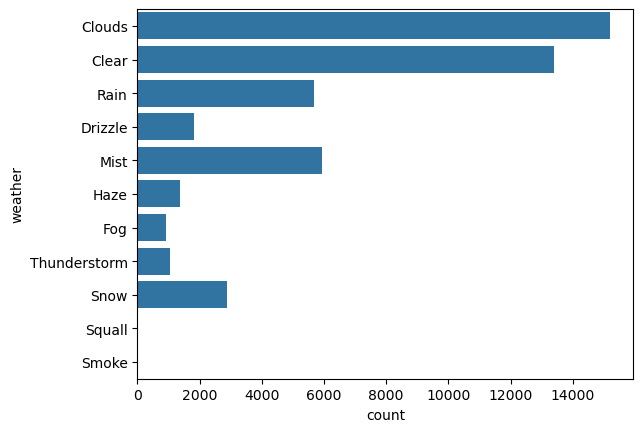

In [39]:
sns.countplot(data['weather'])

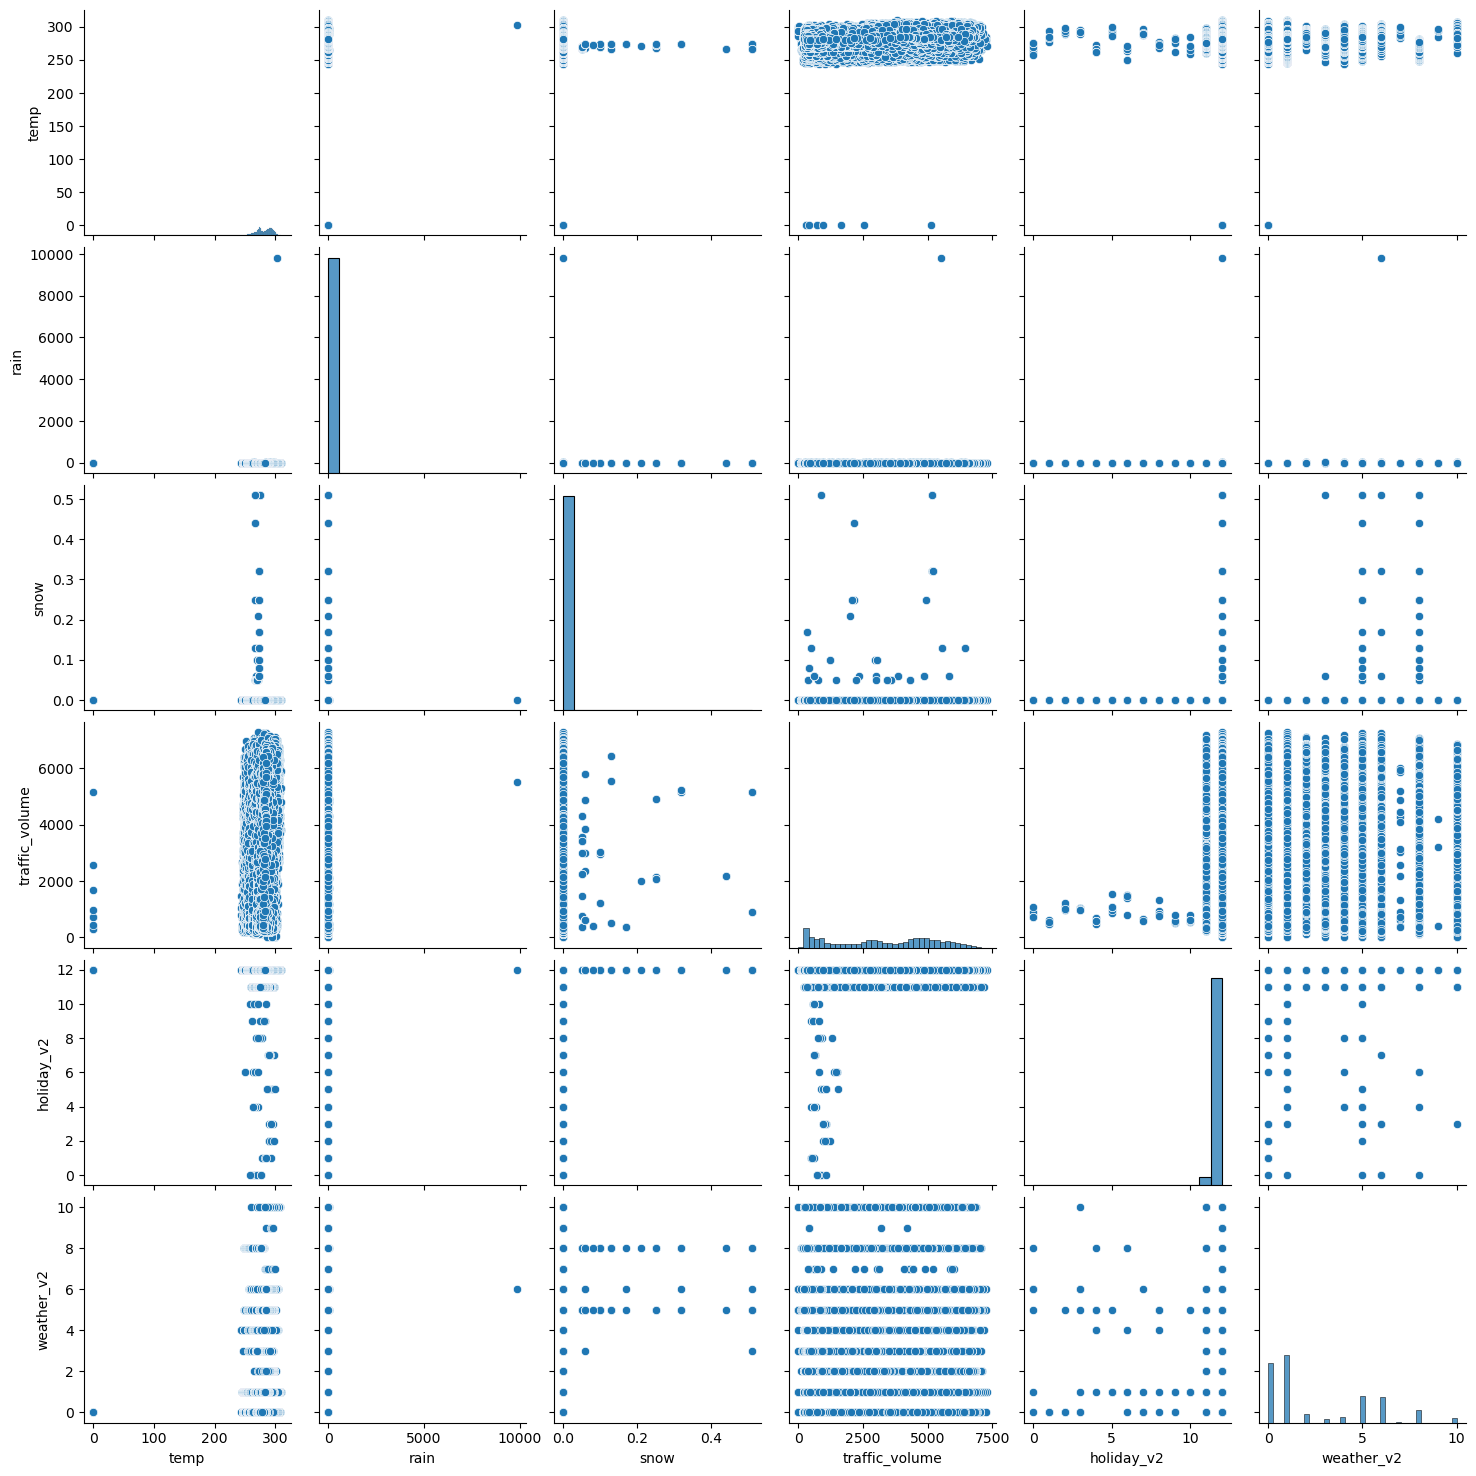

In [45]:
sns.pairplot(data)

<Axes: >

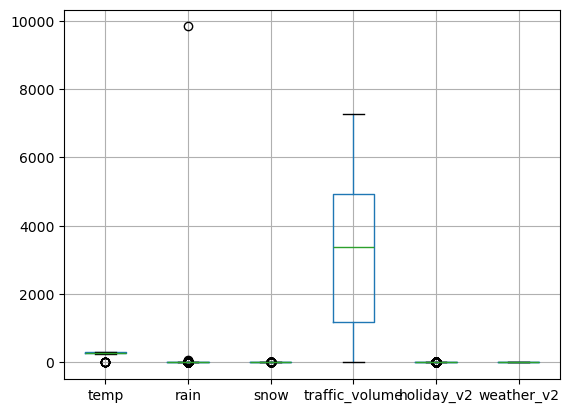

In [47]:
data.boxplot()

In [39]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [54]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [55]:
from sklearn import metrics
print(metrics.r2_score(p1,y_train))
print(metrics. r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics. r2_score(p4,y_train))
print(metrics. r2_score(p5, y_train))

-5.561710462963816
1.0
0.9755854069159243
-12.981492985608888
0.8443238139152527


In [56]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

In [57]:
print(metrics. r2_score(p1,y_test))
print(metrics. r2_score(p2,y_test))
print(metrics. r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics. r2_score(p5,y_test))

-5.517450333382518
0.7116475902615651
0.8106894852522147
-12.877084828433947
0.806355893611908


In [52]:
MSE = metrics.mean_squared_error(p3, y_test)
t1=np.sqrt(MSE)
print(t1)

785.3753536916719


In [61]:
x = data[['temp','rain','snow','hours']]
y = data['traffic_volume']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_scaled,y)

RandomForestRegressor()

In [64]:
# .pkl was written as .pk1
import pickle
pickle.dump(model, open("model.pkl", 'wb'))
# pickle.dump(le, open("encoder.pkl", 'wb'))
pickle.dump(scaler, open("scale.pkl", 'wb'))